# How to use the predictor from the marginalized posterior

In [2]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph,Kingdom,Occurrence
from drivers.graph_models import Cell,Mex4km, countObjectsOf
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import numpy as np

## Use the ggplot style
plt.style.use('ggplot')

A walkthrough to generate a fully spatial predictions from the data structure point of view. This is, the object not only has defined the outcomes as a vector or matrix. It is embeded in a fully functional raster that can be exported for later analysis.

For the purposes of this demo the outcomes have been already calculated and are stored in the `/outputs` directory with the name `count_occurrences_dem.npy`



In [3]:
data = np.load('/outputs/count_occurrences_dem.npy')

In [4]:
## Test the raster api model with modifications for class raster
from sketches.models import Country
from mesh.models import MexMesh

Mexico = Country.objects.filter(name__contains="exico").get()
mexican_cells = MexMesh.objects.filter(cell__intersects=Mexico.geom)

In [5]:
from raster_api.tools import RasterData,Raster
from raster_api.models import ETOPO1

In [6]:
elev = RasterData(ETOPO1,border=Mexico.geom)

In [7]:
pixel_size = 0.3
elev.rescale(pixel_size)

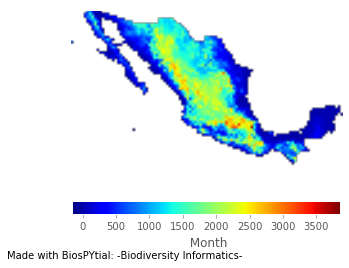

In [8]:
elev.display_field(origin='Lower')

In [9]:
b1 = elev.rasterdata.bands[0]

## Create a new Raster Object with the predictions

In [15]:
## Import container
from raster_api.tools import RasterContainer

In [16]:
raster_model = RasterContainer(data,use_metadata_from=elev.rasterdata)

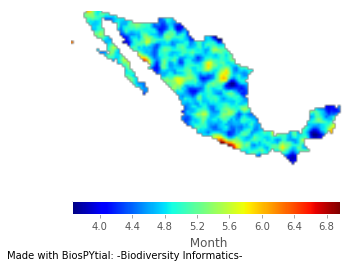

In [17]:
raster_model.display_field(band=2,origin='Lower')

## Export to GeoTiff
The model has been integrated into a spatialized raster object. 
One of it's method is Geotif exportation.

In [13]:
raster_model.exportToGeoTiff('LatentGaussianCountTest1')

The result has been exported to GeoTif and imported into QGIS. This is how it looks like:
<img src="../count_regressiontest1.png" alt="Drawing" style="width: 500px;"/>